# Data Exploration
<br> Here, we will be answering the following questions:
1. What are the cafe rankings based on average rating?
2. How does a cafe get a good or bad rating?
3. What are the overall conclusions we can make from exploring the data?

But before that, we have to import some modules and also the dataframe that we collected and pre-processed.

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
reviews_df = pd.read_excel("../2. Data Pre-processing/kl_selangor_cafe_reviews.xlsx")
reviews_df

rating                       cafe_name  number_of_images estimated_date  \
0         4                        6Yi Cafe                10     2024-01-07   
1         4                        6Yi Cafe                10     2023-12-07   
2         5                        6Yi Cafe                 2     2023-12-07   
3         5                        6Yi Cafe                19     2023-06-07   
4         4                        6Yi Cafe                 2     2023-09-07   
..      ...                             ...               ...            ...   
675       4  半刻 Ban Ke Cafe @ Happy Mansion                 3     2024-05-07   
676       4  半刻 Ban Ke Cafe @ Happy Mansion                 6     2024-02-07   
677       5  半刻 Ban Ke Cafe @ Happy Mansion                 3     2024-01-07   
678       4  半刻 Ban Ke Cafe @ Happy Mansion                 1     2024-04-07   
679       5  半刻 Ban Ke Cafe @ Happy Mansion                 4     2023-12-07   

                                 description_processed  
0    nice quite friendly cafe food like homely meal...  
1    nice quiet place coffee cake lunch design retr...  
2    rare simple cosy cafe open till 12am considere...  
3    kindhearted cafe owner lot street abandoned an...  
4    cosy environment lot quality books free read o...  
..                                                 ...  
675  small cafe tucked away popular section 17 happ...  
676  love place especially upstairs little kitchen ...  
677  saw cafe xhs decided try overall good didnt re...  
678  time nice ambience friendly staffs fantastic f...  
679  try highly recommended 1st try ordering grab s...  

[680 rows x 5 columns]

## 1. What are the cafe rankings based on average rating?
* To answer this question, we have to group the reviews based on their cafe name
* Then we create a visual to show the cafe rankings

In [3]:
# Group by 'cafe_name' and perform the required aggregations
grouped_df = reviews_df.groupby('cafe_name').agg({
    # Get the number of ratings,
    'description_processed': 'count',
    # Get the average rating score,
    'rating': 'mean',
    # Get the total number of images 
    'number_of_images': 'sum',
    # Get the max and min date
    'estimated_date': ['min', 'max']
}).reset_index()
grouped_df

# Flatten the MultiIndex columns resulting from aggregation so that the max and min dates appear as separate columns
grouped_df.columns = ['cafe_name', 'number_of_ratings','average_rating','total_number_of_images', 'earliest_date', 'latest_date']

grouped_df

cafe_name  number_of_ratings  average_rating  \
0                          6Yi Cafe                  8           4.375   
1             ALLO by The Owls Cafe                  8           3.875   
2                          AMP Cafe                  8           4.500   
3                    ANT Cafe & Bar                  8           4.125   
4               AOOO Melbourne Cafe                  8           4.875   
..                              ...                ...             ...   
80  Yeah Man @ Wanderous Sheep Cafe                  8           4.375   
81                      Yu.Mee cafe                  8           3.500   
82   bröom Artisan Bakery & Kitchen                  8           3.375   
83   半刻 Ban Ke Cafe @ Happy Mansion                  8           4.500   
84              好家婆 Best Ah Ma Cafe                  8           4.750   

    total_number_of_images earliest_date latest_date  
0                       60    2023-06-07  2024-05-10  
1                       34    2023-11-07  2024-05-31  
2                       47    2024-01-07  2024-05-24  
3                       42    2020-06-07  2024-06-02  
4                       47    2024-01-07  2024-05-07  
..                     ...           ...         ...  
80                      24    2023-06-07  2024-05-24  
81                      18    2023-06-07  2024-05-31  
82                      53    2024-02-07  2024-05-31  
83                      57    2023-12-07  2024-05-24  
84                      46    2024-03-07  2024-05-31  

[85 rows x 6 columns]

Remember that our cafe name contains Chinese characters!
* As you can see, I have downloaded the Noto Sans SC font to support Chinese characters and added it to the matplotlib fonts folder
* Follow this link to see how to add support for Chinese characters for plots
<br>https://github.com/ultralytics/ultralytics/issues/5803

In [4]:
import matplotlib.font_manager
[f for f in matplotlib.font_manager.fontManager.ttflist if 'Noto Sans SC' in f.name]

[FontEntry(fname='c:\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NotoSansSC-Regular.ttf', name='Noto Sans SC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]

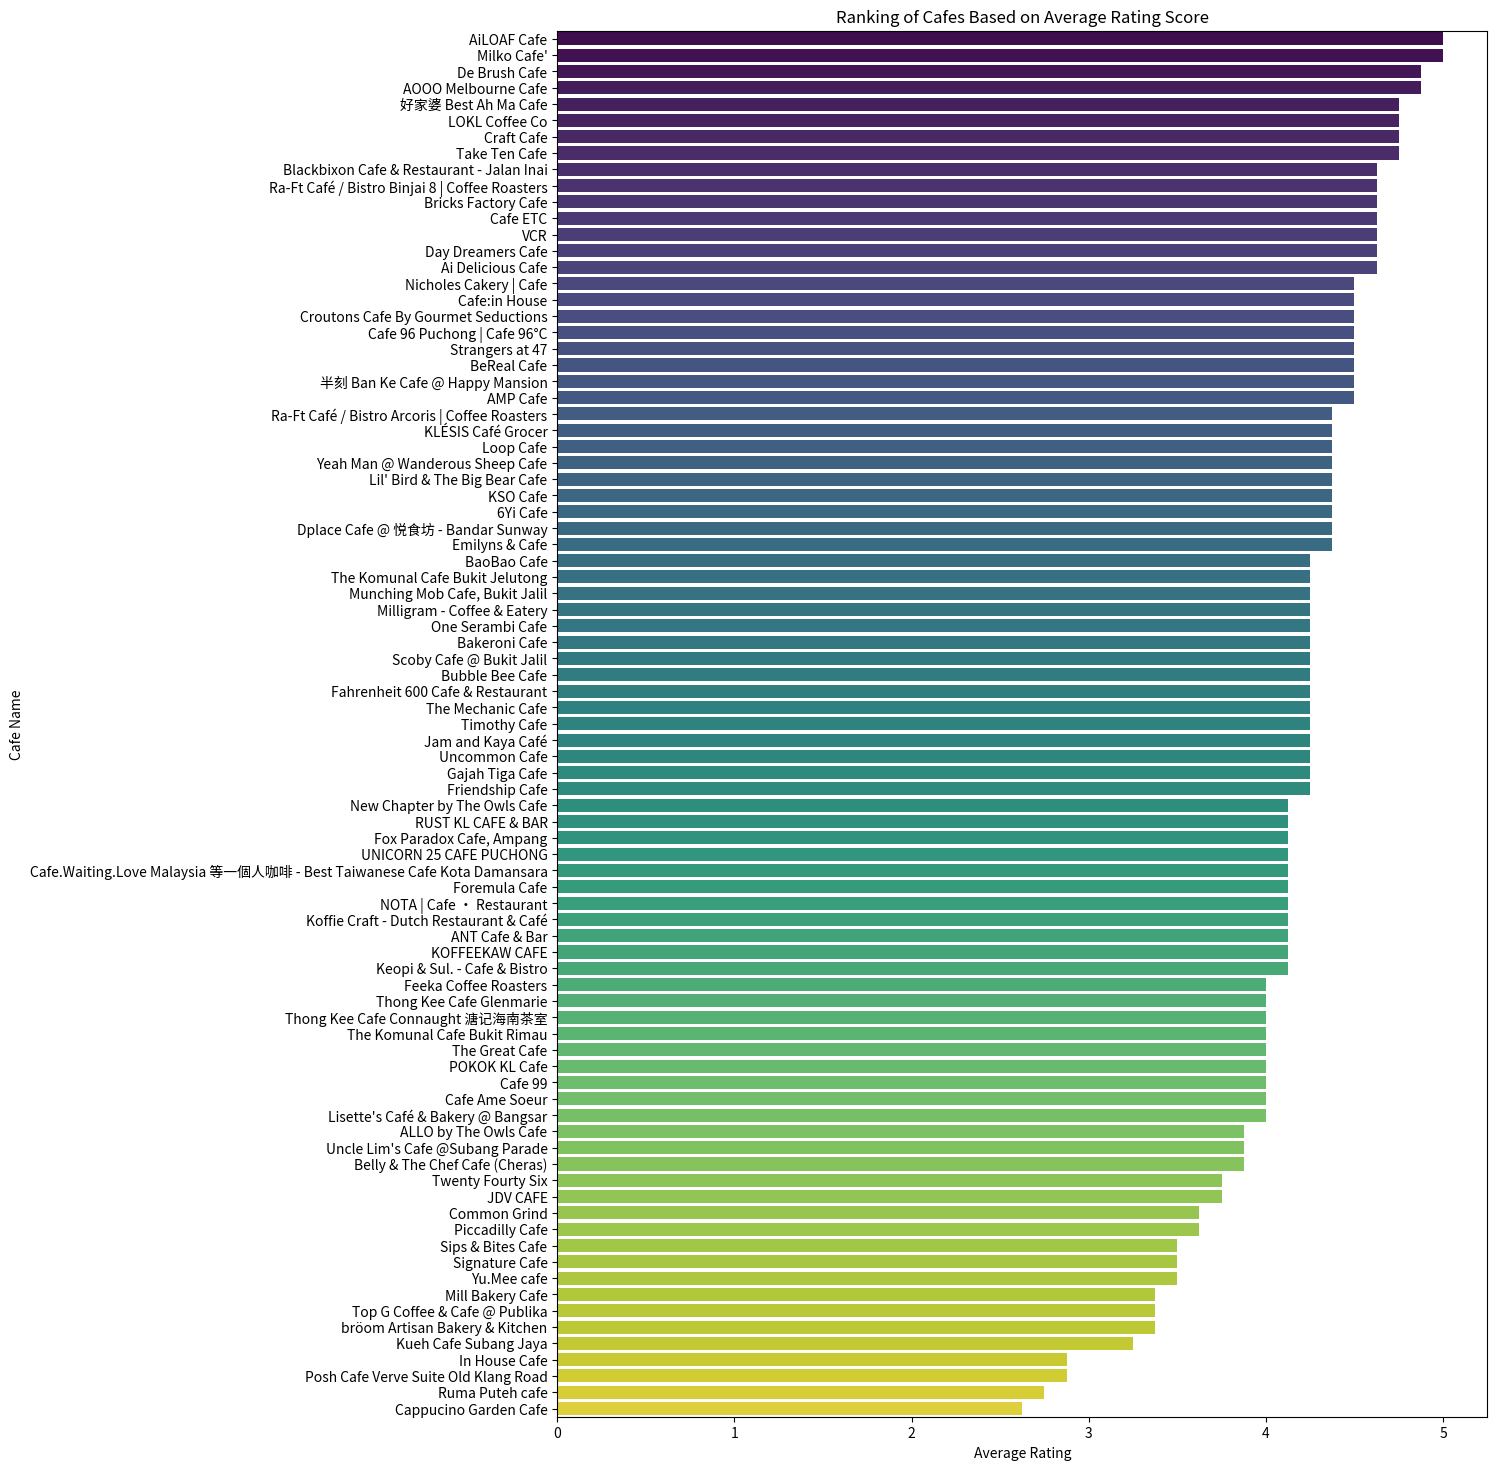

In [5]:
# Sort the DataFrame by 'average_rating' in descending order
grouped_df_sorted = grouped_df.sort_values(by='average_rating', ascending=False)

# Set the font family to one that supports a wide range of characters such as Chinese Characters
plt.rcParams['font.family'] = 'Noto Sans SC'
# Set the size of the plot
plt.figure(figsize=(12, 18))

# Create the bar plot
sns.barplot(x='average_rating', y='cafe_name',  hue="cafe_name",data=grouped_df_sorted, palette='viridis', legend=False)

# Add titles and labels
plt.title('Ranking of Cafes Based on Average Rating Score')
plt.xlabel('Average Rating')
plt.ylabel('Cafe Name')

# Show the plot
plt.show()

In [17]:
# Get the top cafes with average rating more than 4.5
top_cafes = grouped_df_sorted[grouped_df_sorted['average_rating'] >= 4.5]
print(len(top_cafes))
top_cafes

23


cafe_name  number_of_ratings  \
6                                      AiLOAF Cafe                  8   
47                                     Milko Cafe'                  8   
25                                   De Brush Cafe                  8   
4                              AOOO Melbourne Cafe                  8   
84                             好家婆 Best Ah Ma Cafe                  8   
43                                  LOKL Coffee Co                  8   
22                                      Craft Cafe                  8   
66                                   Take Ten Cafe                  8   
11       Blackbixon Cafe & Restaurant - Jalan Inai                  8   
60  Ra-Ft Café / Bistro Binjai 8 | Coffee Roasters                  8   
12                             Bricks Factory Cafe                  8   
17                                        Cafe ETC                  8   
79                                             VCR                  8   
24                               Day Dreamers Cafe                  8   
5                                Ai Delicious Cafe                  8   
53                          Nicholes Cakery | Cafe                  8   
19                                   Cafe:in House                  8   
23             Croutons Cafe By Gourmet Seductions                  8   
14                     Cafe 96 Puchong | Cafe 96°C                  8   
65                                 Strangers at 47                  8   
9                                      BeReal Cafe                  8   
83                  半刻 Ban Ke Cafe @ Happy Mansion                  8   
2                                         AMP Cafe                  8   

    average_rating  total_number_of_images earliest_date latest_date  
6            5.000                      35    2024-01-07  2024-05-24  
47           5.000                      27    2023-12-07  2024-05-31  
25           4.875                      23    2023-08-07  2024-05-07  
4            4.875                      47    2024-01-07  2024-05-07  
84           4.750                      46    2024-03-07  2024-05-31  
43           4.750                      32    2024-02-07  2024-05-31  
22           4.750                      46    2024-01-07  2024-05-31  
66           4.750                      41    2023-07-07  2024-05-31  
11           4.625                      53    2024-01-07  2024-05-31  
60           4.625                      32    2023-06-07  2024-06-02  
12           4.625                      13    2023-06-07  2024-06-01  
17           4.625                      30    2024-01-07  2024-05-24  
79           4.625                      29    2024-02-07  2024-05-24  
24           4.625                      57    2024-01-07  2024-05-07  
5            4.625                      40    2024-01-07  2024-05-07  
53           4.500                      35    2024-04-07  2024-06-03  
19           4.500                      20    2024-03-07  2024-06-02  
23           4.500                      40    2023-06-07  2024-04-07  
14           4.500                      69    2023-08-07  2024-06-02  
65           4.500                      48    2024-01-07  2024-06-02  
9            4.500                      40    2023-07-07  2024-05-24  
83           4.500                      57    2023-12-07  2024-05-24  
2            4.500                      47    2024-01-07  2024-05-24

Conclusion 1:
* Out of 85 of the cafes in the dataset, 23 of them are great
* This is because these 23 cafes have an average rating of 4.5 or more
* The two best cafes (tied at average rating of 5.0) are AiLOAF Cafe and Milko Cafe'

In [16]:
# Get the bottom cafes with average rating less than 3.5
bottom_cafes = grouped_df_sorted[grouped_df_sorted['average_rating'] <= 3.5]
print(len(bottom_cafes))
bottom_cafes

11


cafe_name  number_of_ratings  average_rating  \
64                     Sips & Bites Cafe                  8           3.500   
63                        Signature Cafe                  8           3.500   
81                           Yu.Mee cafe                  8           3.500   
48                      Mill Bakery Cafe                  8           3.375   
74         Top G Coffee & Cafe @ Publika                  8           3.375   
82        bröom Artisan Bakery & Kitchen                  8           3.375   
42                 Kueh Cafe Subang Jaya                  8           3.250   
34                         In House Cafe                  8           2.875   
57  Posh Cafe Verve Suite Old Klang Road                  8           2.875   
61                       Ruma Puteh cafe                  8           2.750   
20                 Cappucino Garden Cafe                  8           2.625   

    total_number_of_images earliest_date latest_date  
64                      38    2023-09-07  2024-05-07  
63                      47    2023-11-07  2024-05-31  
81                      18    2023-06-07  2024-05-31  
48                      67    2023-07-07  2024-04-07  
74                       7    2023-07-07  2024-05-17  
82                      53    2024-02-07  2024-05-31  
42                      48    2023-09-07  2024-04-07  
34                      20    2023-12-07  2024-05-07  
57                      31    2020-06-07  2024-02-07  
61                      54    2024-01-07  2024-06-01  
20                      21    2021-06-07  2024-05-31

Conclusion 2:
* Out of 85 of the cafes in the dataset, 1 of them are awful
* This is because these 11 cafes have an average rating of 3.5 or less
* The worst cafe is Cappucino Garden Cafe with an average rating of 2.625

## 2. How does a cafe get a good or bad rating?
* To answer this question we need to analyse the common words and phrases used in these reviews to see what each rating has in common
* First, we need to group the reviews by their rating from 1 to 5
* Then, we will generate a word cloud and bar chart of top words (or phrases) for each group / subset of the review data

In [59]:
#group the reviews by their rating from 1 to 5
reviews_by_stars = []
for i in range (0,5,1):
    reviews_by_stars.append(reviews_df[reviews_df['rating'] == 5-i].reset_index(drop=True))

# Print the count of reviews for each rating
for i in range (0,5,1):
    print(f"Number of {5-i}-star reviews: {len(reviews_by_stars[i])}")

Number of 5-star reviews: 323
Number of 4-star reviews: 224
Number of 3-star reviews: 77
Number of 2-star reviews: 26
Number of 1-star reviews: 30


In [60]:
from collections import Counter
import re
# Function to generate Word Cloud
def generate_ngram_word_cloud(text, n):
    # Tokenize the text into words
    words = nltk.word_tokenize(text.lower())
    
    # Generate n-grams (phrases of n words)
    ngrams = list(nltk.ngrams(words, n))
    
    # Join each n-gram into a single string
    ngram_strings = [' '.join(ngram) for ngram in ngrams]
    
    # Count the frequencies of each n-gram
    ngram_counts = Counter(ngram_strings)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_counts)
    
    return wordcloud, ngram_counts

In [61]:
# Function to generate bar chart to show top words (or phrases)
def plot_top_ngrams(ngram_counts, ax, phrase_length):
    # Display bar chart of top 15 words/phrases
    most_common_ngrams = ngram_counts.most_common(15)
    ngrams, counts = zip(*most_common_ngrams)
    ax.barh(ngrams, counts, color='skyblue')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.set_xlabel('Frequency')
    ax.set_title(f"Top 15 Common {phrase_length}-word Phrases")

In [62]:
# Function to generate three Word Cloud and Bar Chart pairs, with phrase lengths = 1 , 2 and 3 for each pair 
def generate_visualizations_for_review_subset(review_subset):
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))
    
    # Generate and display word clouds and bar charts
    for row, phrase_length in zip(axes, range(1, 4, 1)):
        # Generate word cloud and get ngram counts
        wordcloud, ngram_counts = generate_ngram_word_cloud(' '.join(review_subset["description_processed"]), phrase_length)
        
        # Display word cloud
        row[0].imshow(wordcloud, interpolation='bilinear')
        row[0].axis('off')
        if phrase_length == 1:
            row[0].set_title(f"Common Words in {review_subset['rating'][0]} Star Reviews")
        else:
            row[0].set_title(f"Common {phrase_length}-word Phrases in {review_subset['rating'][0]} Star Reviews")
        
        # Call function to display bar chart
        plot_top_ngrams(ngram_counts, row[1], phrase_length)
    
    plt.tight_layout()
    plt.show()

### Let us generate some graphs!

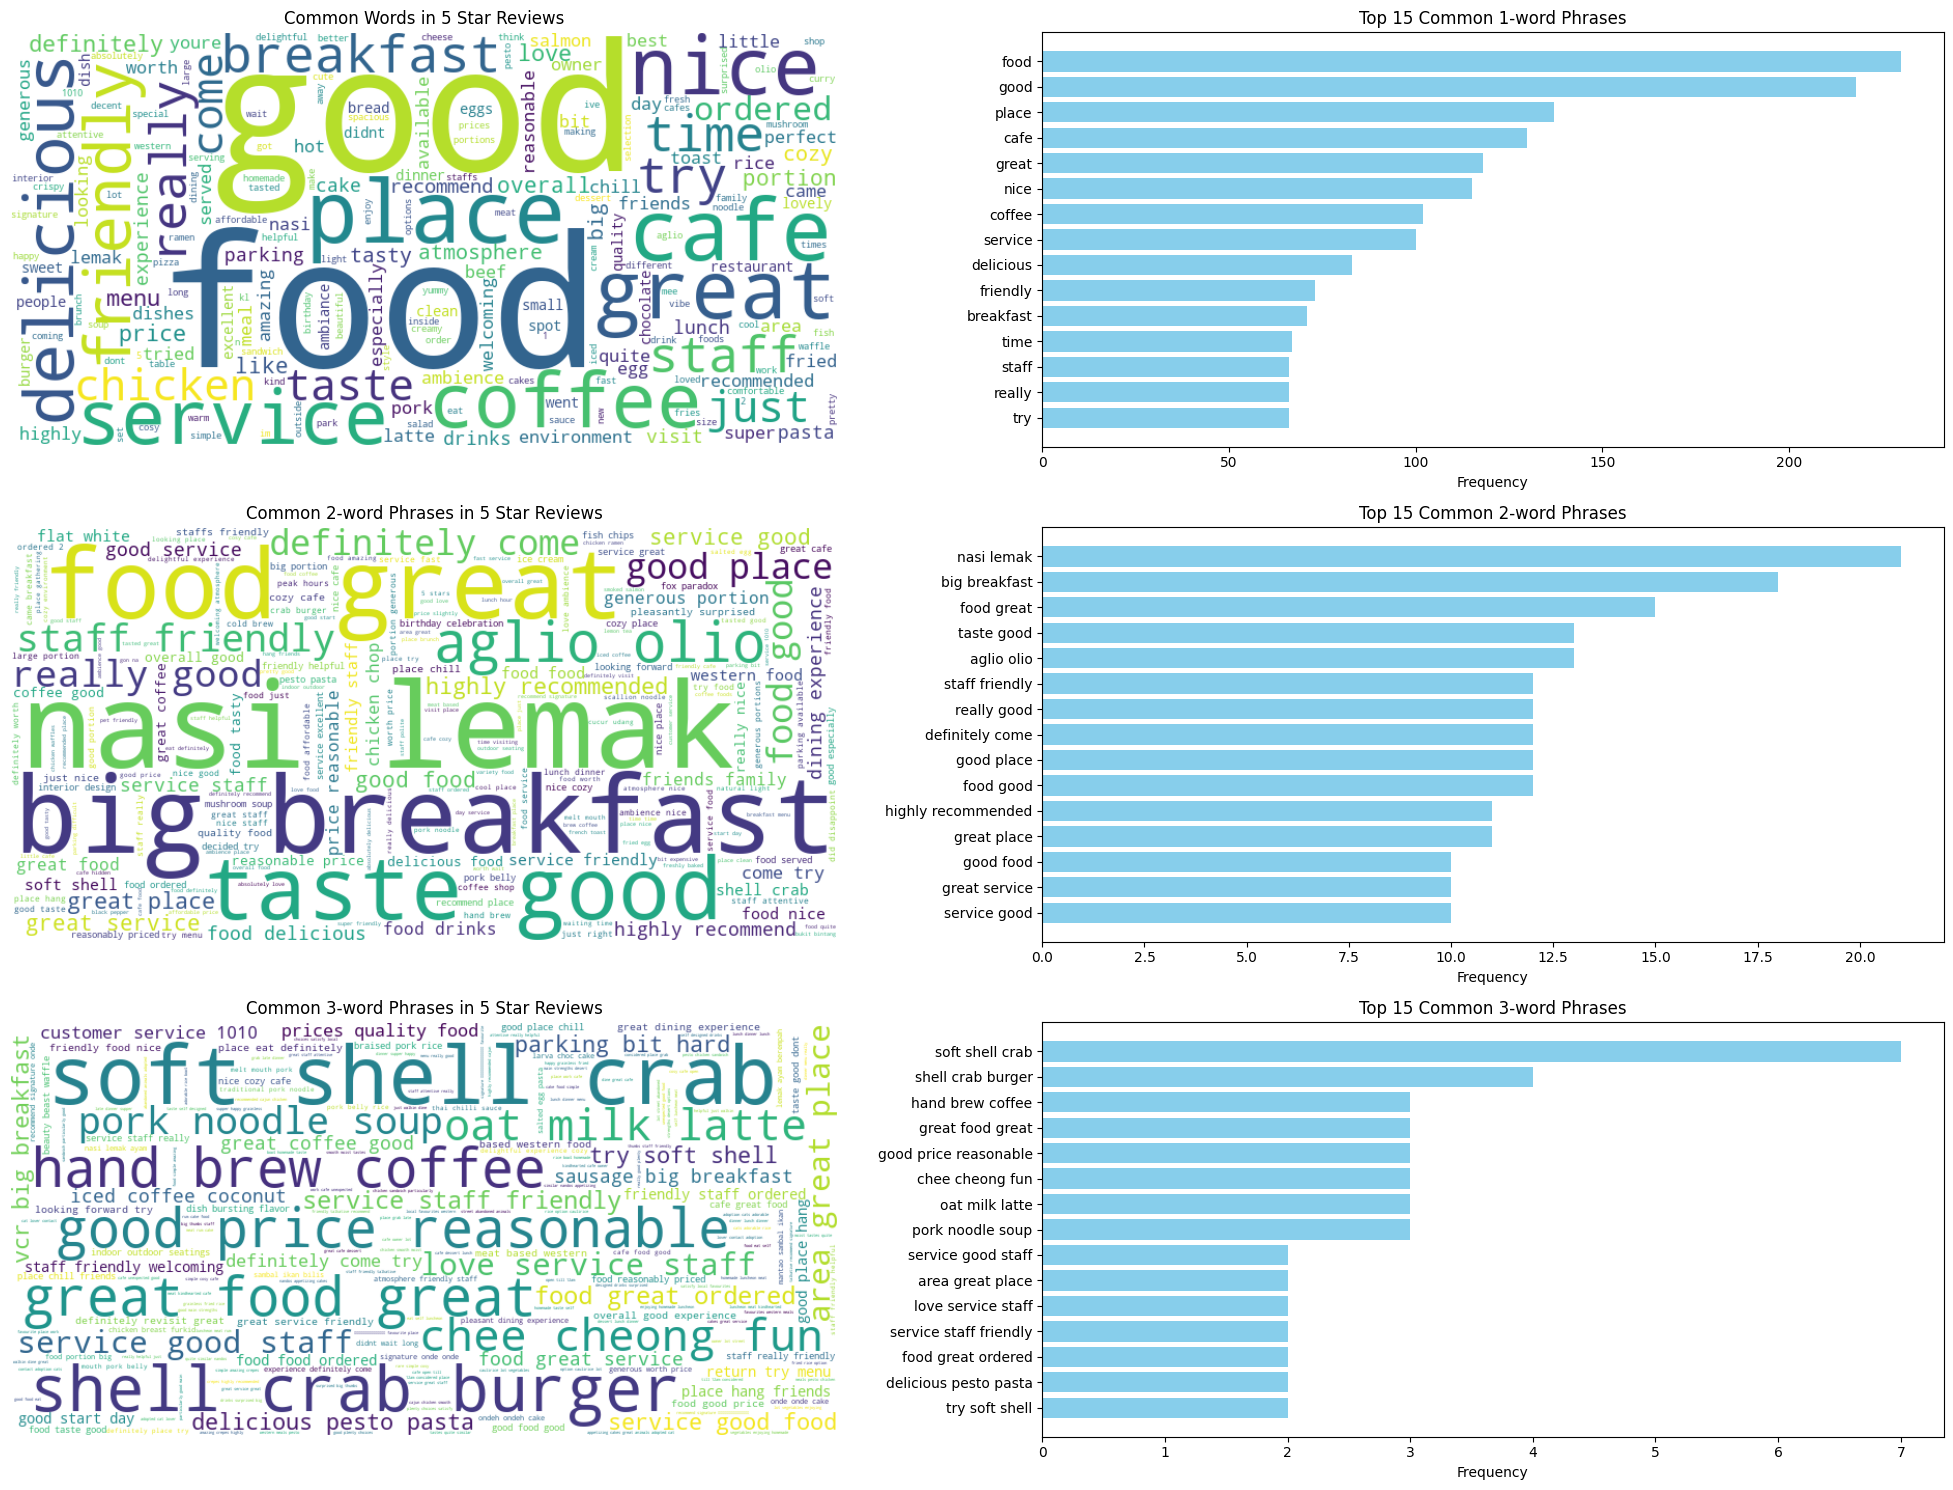

In [63]:
# Graph for 5 star review subset
generate_visualizations_for_review_subset(reviews_by_stars[0])

For 5 star reviews:
1. Most frequent words for 5 star reviews are "food" and "good" but it doesn't really tell us much...
<br>Sub-conclusion 1: We need more info... Are the words "food" and "good" actually used in the same context? <br>
<br>
2. Most frequent 2-word phrases for 5 star reviews (if you ignore dish names) are "taste good" and "staff friendly".
<br>Sub-conclusion 2: Now we know, that 5 star reviewed restaurants have good tasting food and friendly staff!<br>
<br>
3. Other significant 2-word phrases are "definitely come" and "highly reccomended".
<br>Sub-conclusion 3: This shows that the place has to be amazing for ther user to give 5 stars<br>
<br>
4. Most frequent 3-word phrases for 5 star reviews (also if you ignore dish names) are "great food great" and "good price reasonable" and "service good staff".
<br>Overall Conclusion: Now we know that TASTE, SERVICE and PRICE have to be AMAZING for a cafe to get 5 stars.<br>
<br>
 

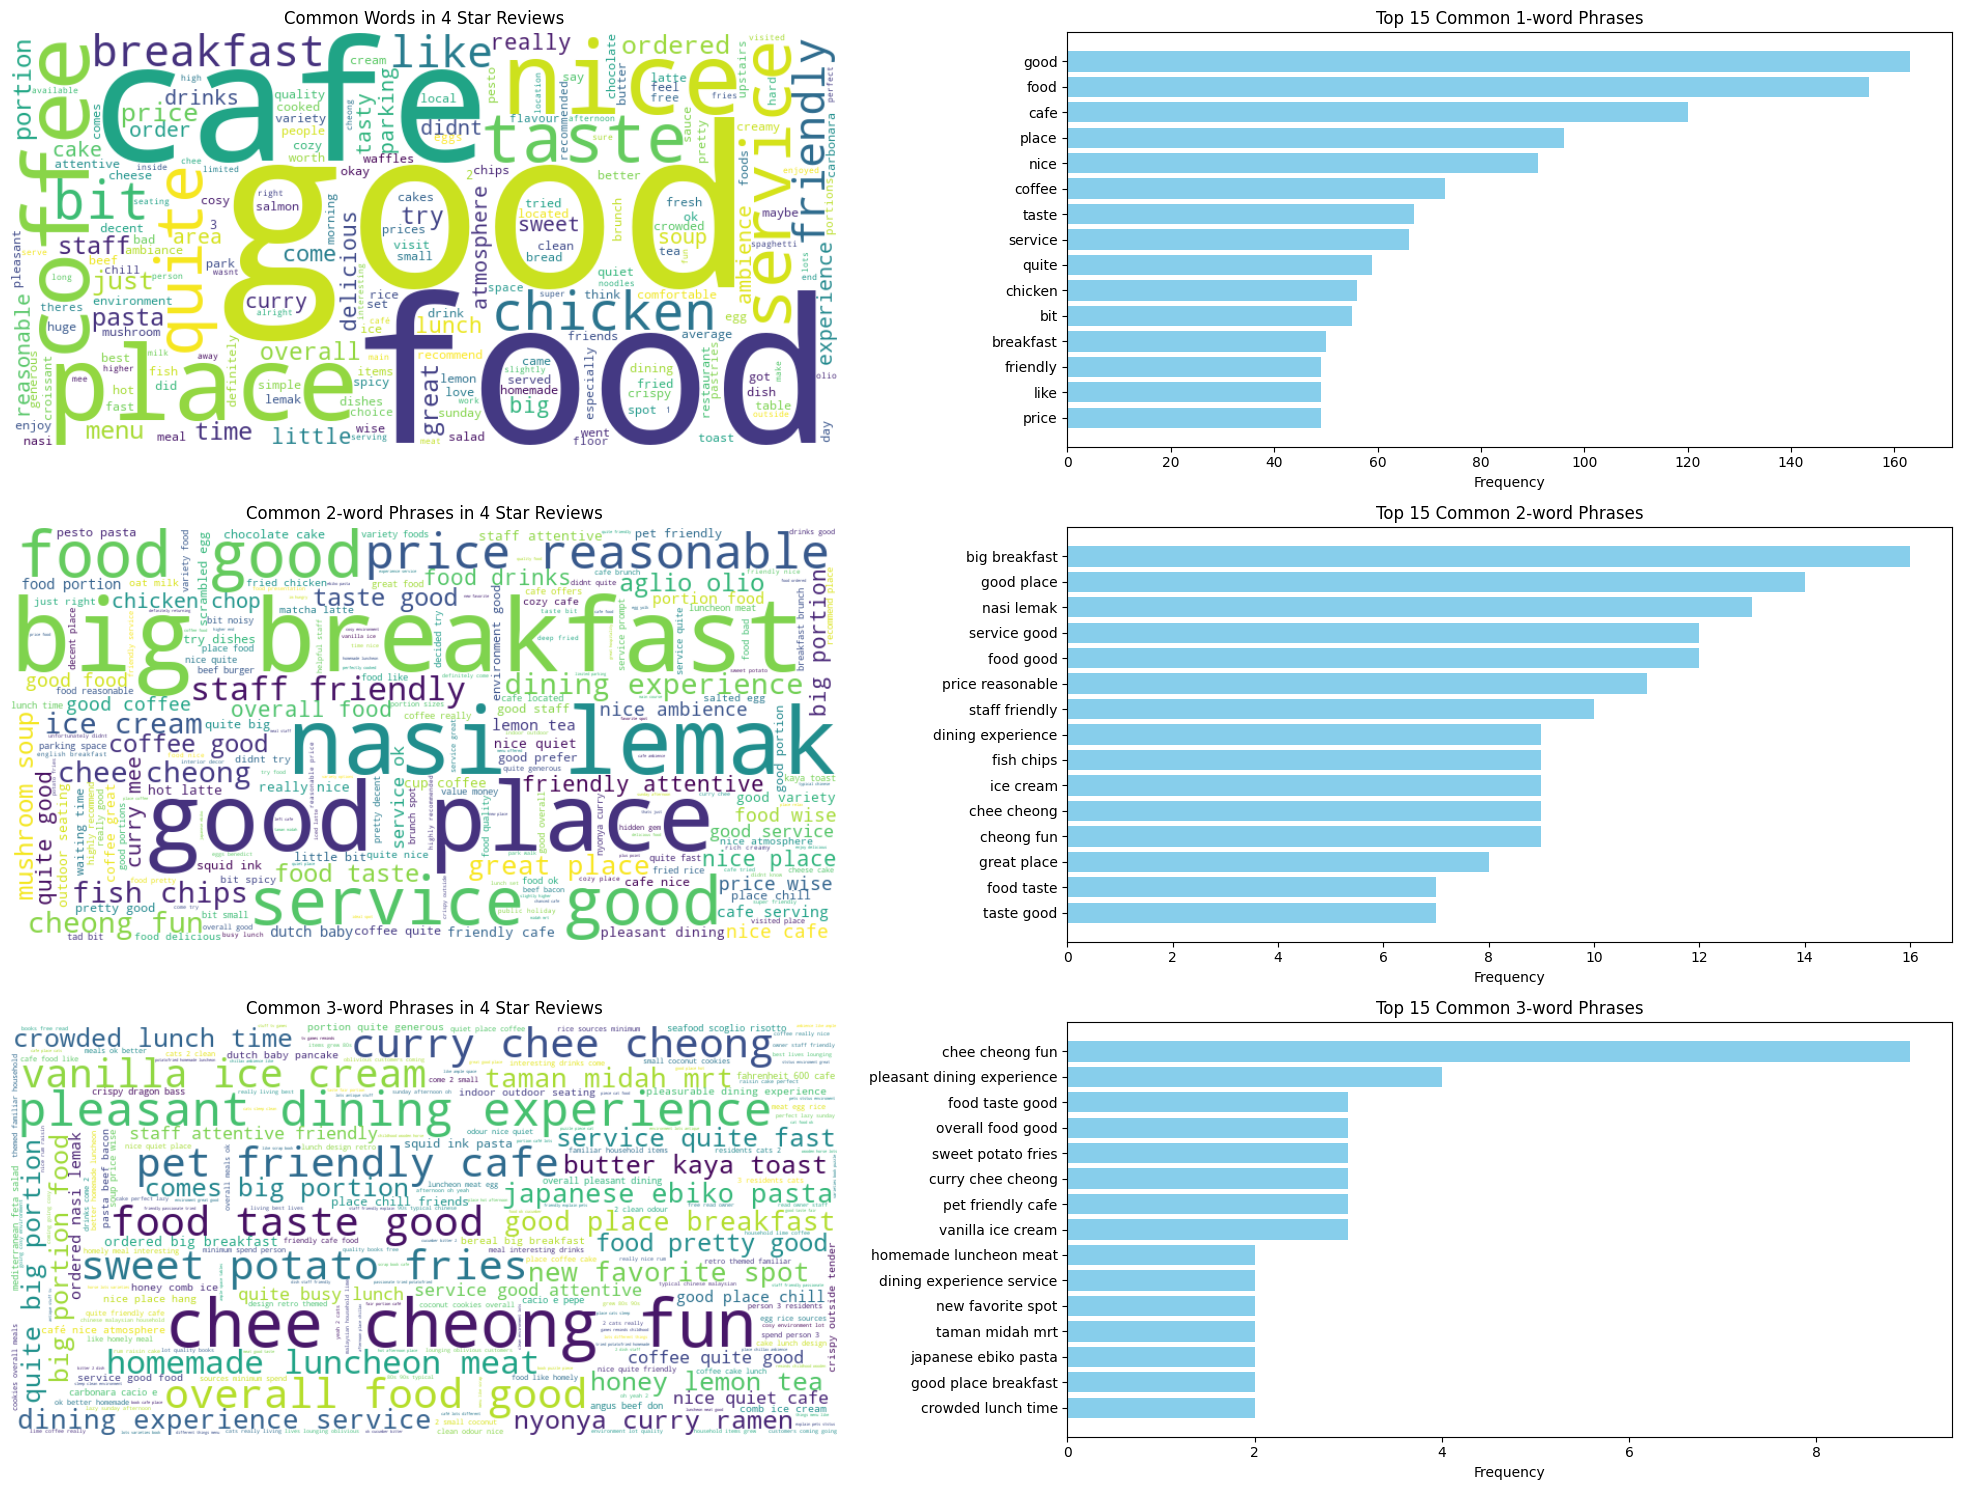

In [64]:
# Graph for 4 star review subset
generate_visualizations_for_review_subset(reviews_by_stars[1])

For 4 star reviews:
1. Most frequent words for 4 star reviews are very similar to 5 star reviews, but there is a difference! Now, there are "hedging words" like "bit" and "quite"
<br>Sub-conclusion 1: These hedging words that show the user's hesitation. Meaning, they think that the place is good, but not AMAZING.<br>
<br>
2. Most frequent 2-word phrases for 4 star reviews are also very similar to 5 star reviews, but this time, there is a lack of enthusiasm and strong reccomendation. Phrases similar to "definitely come" and "highly reccomended" are not present here.
<br>Sub-conclusion 2: This further emphesises that these 4 star rated places are good, but lack a novel experience that causes people to want to recommend them to others.<br>
<br>
3. Frequent 3-word phrases for 4 star reviews include an interesting one which is "new favourite spot".
<br>Overall Conclusion: 4 star reviewed cafes have GOOD FOOD, SERVICE, PRICE and can still be great places for returning customers. But, they lack an extra novel experience, causing customers to hesitate in givint it 5 stars and to reccomend it to others<br><br>

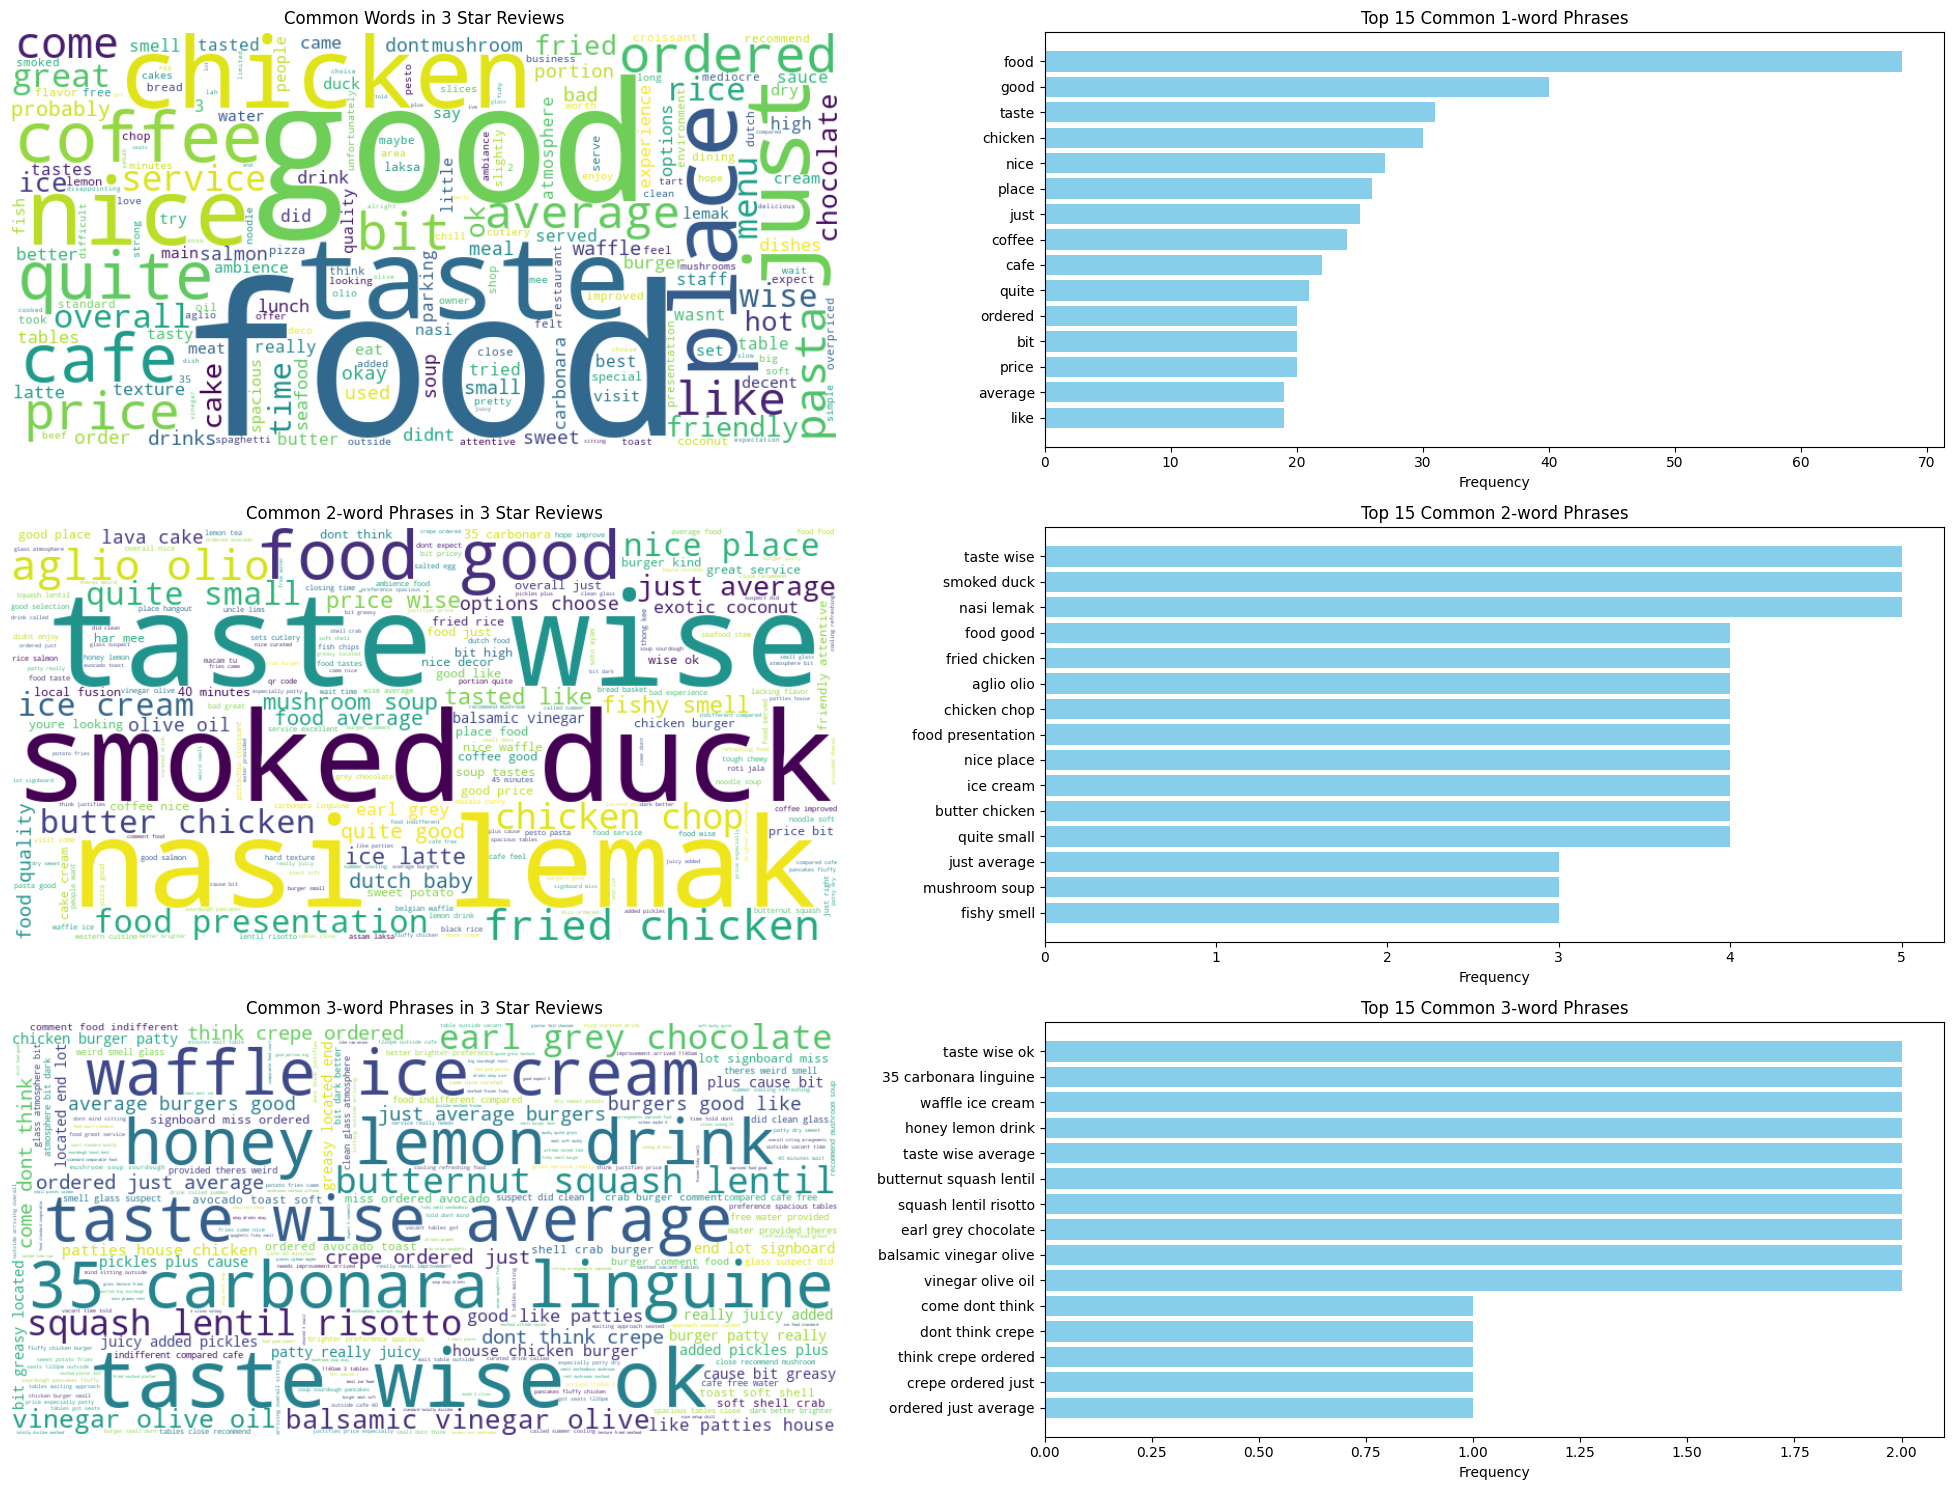

In [68]:
# Graph for 3 star review subset
generate_visualizations_for_review_subset(reviews_by_stars[2])

For 3 star reviews:
1. These reviews show the "hedging words" like in 4 star reviews.
<br>Sub-conclusion 1: Cafes with 3 star reviews definitely aren't amazing<br>
<br>
2. Most frequent 2-word phrases now contain no mention of SERVICE nor PRICE. Instead, it now has some complaints about food like "quite small" and "fishy smell"
<br>Sub-conclusion 2: Cafes with 3 star reviews start to show flaws in the food. Service and Price do not matter in comparison with these flaws<br>
<br>
3. Frequent 3-word phrases are "taste wise ok", "taste wise average",
<br>Overall Conclusion: 3 star reviews do not really mention service and price, showing that it is mediocre or insignificant to mention in the review. Instead, these reviews focus most on the food taste and quality. Thus, restaurant that have 3 star review mostly have food that is just NORMAL, AVERAGE or ALRIGHT. <br><br>

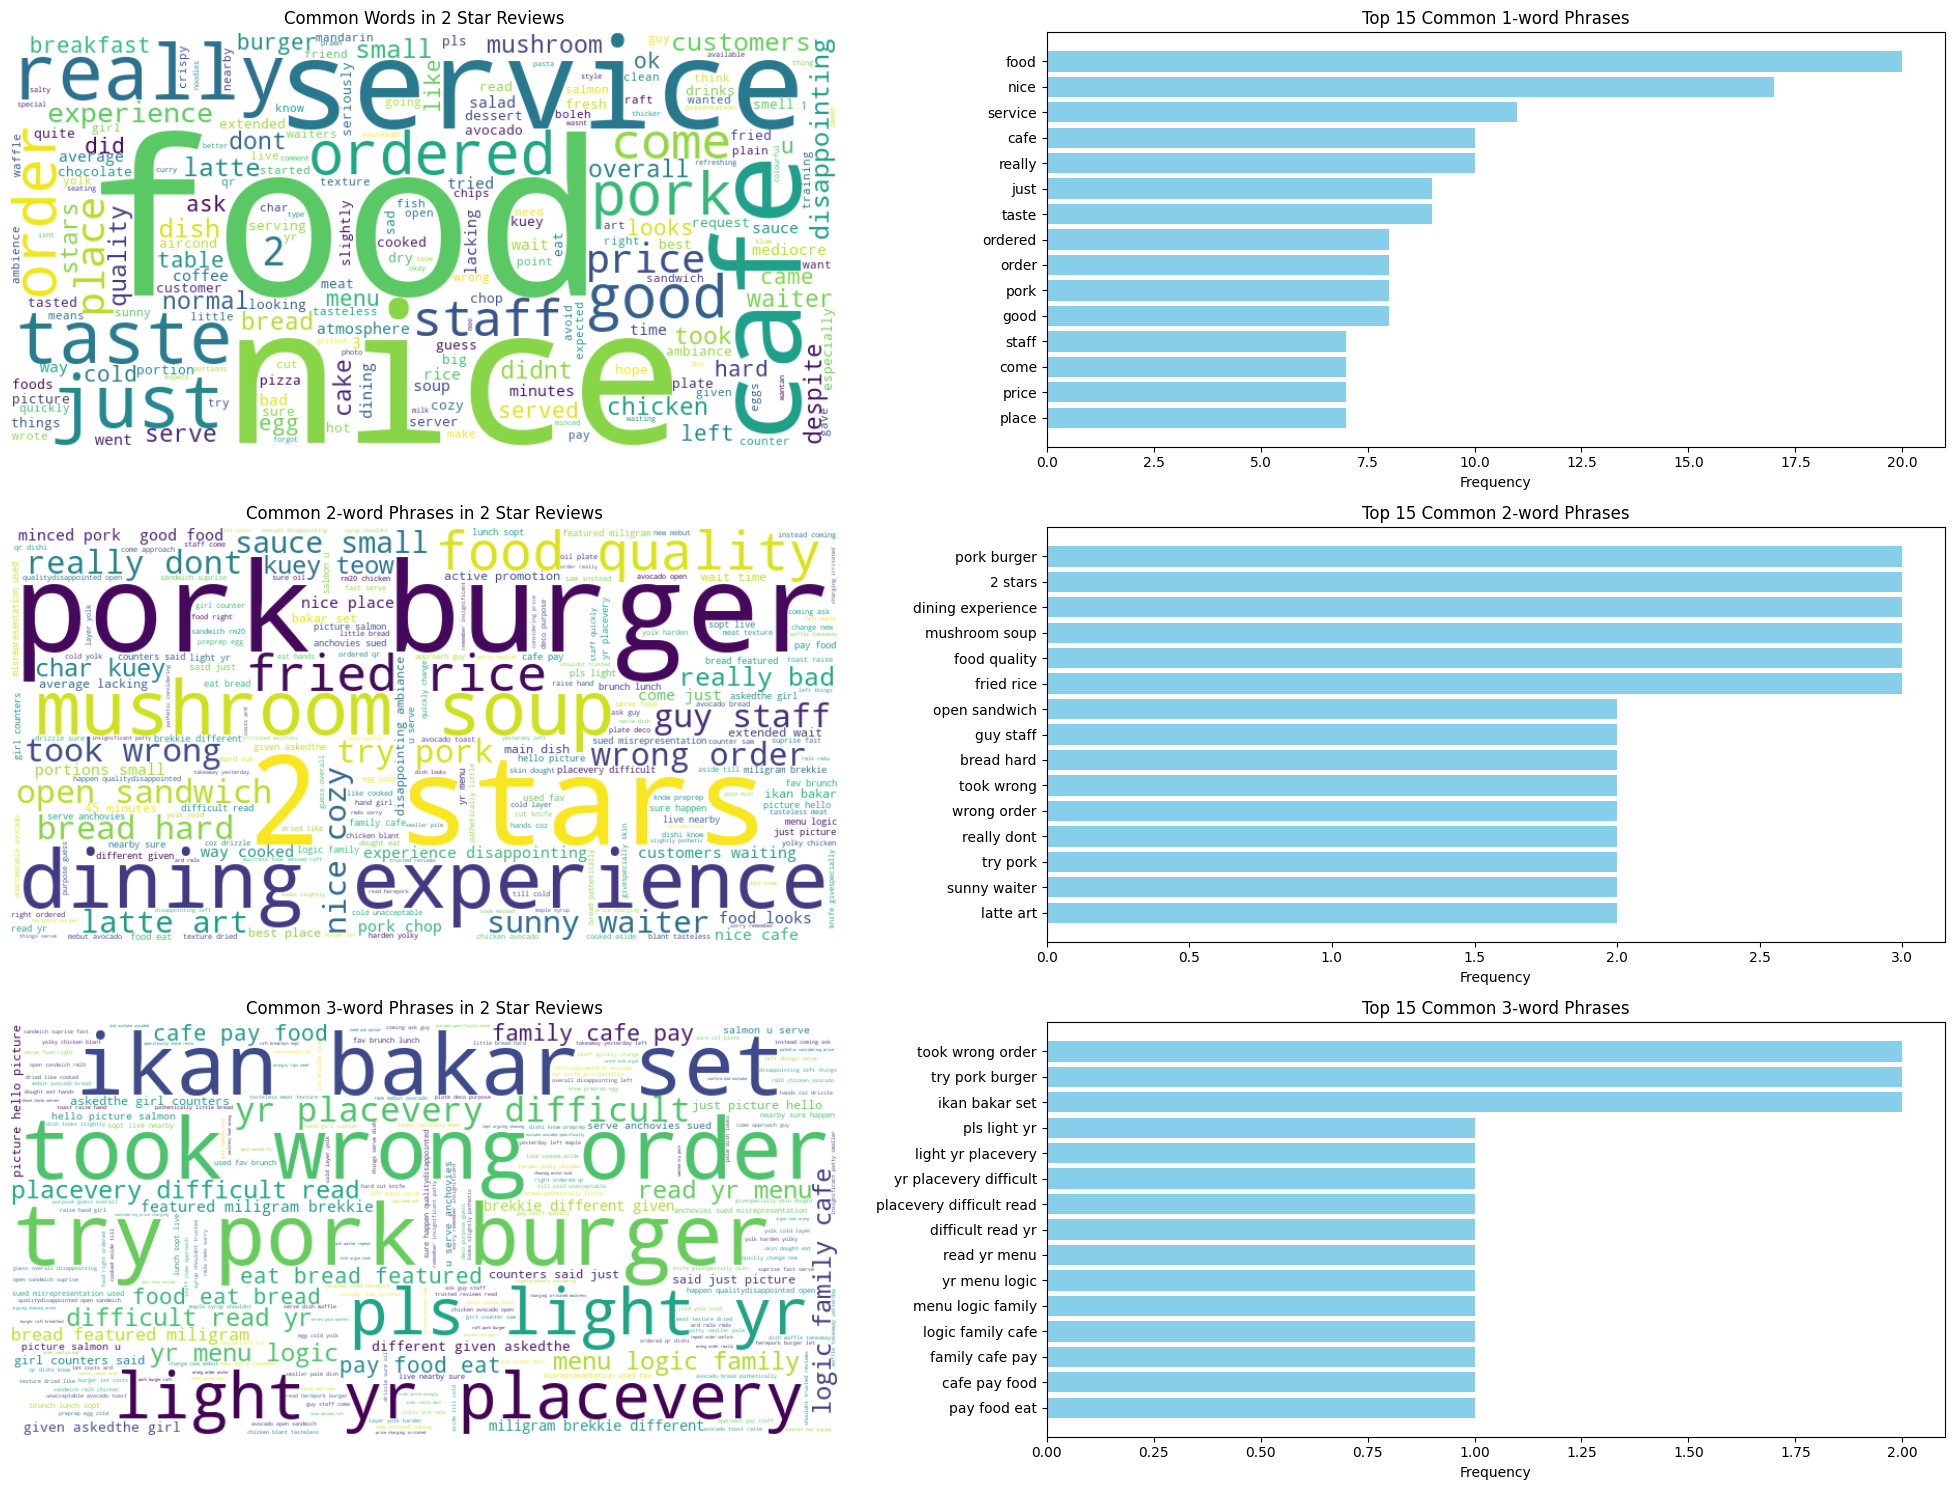

In [69]:
# Graph for 2 star review subset
generate_visualizations_for_review_subset(reviews_by_stars[3])

For 2 star reviews:
1. The word "good" has been replaced with "nice" for second most frequent word.
<br>Sub-conclusion 1: Cafes with 2 star reviews are no longer "good" they are just "nice". This change is significant as "nice" is just a polite way of saying "just alright" or "so-so"<br>
<br>
2. Most frequent 2-word phrases now contain hprases like "food quality", "dining experience", "guy staff" and "wrong order". This is interesting as SERVICE is being mentioned again. Unlike in 3 star reviews, where its just all about food.
<br>Sub-conclusion 2: Cafes with 2 star reviews start to show flaws in the FOOD and SERVICE.<br>
<br>
3. The only significant 3-word phrase here is "took wrong order"
<br>Overall Conclusion: Cafes with 2 star reviews have flaws in FOOD and SERVICE. There is also mention of mistakes by staff such as wrong orders.<br><br>

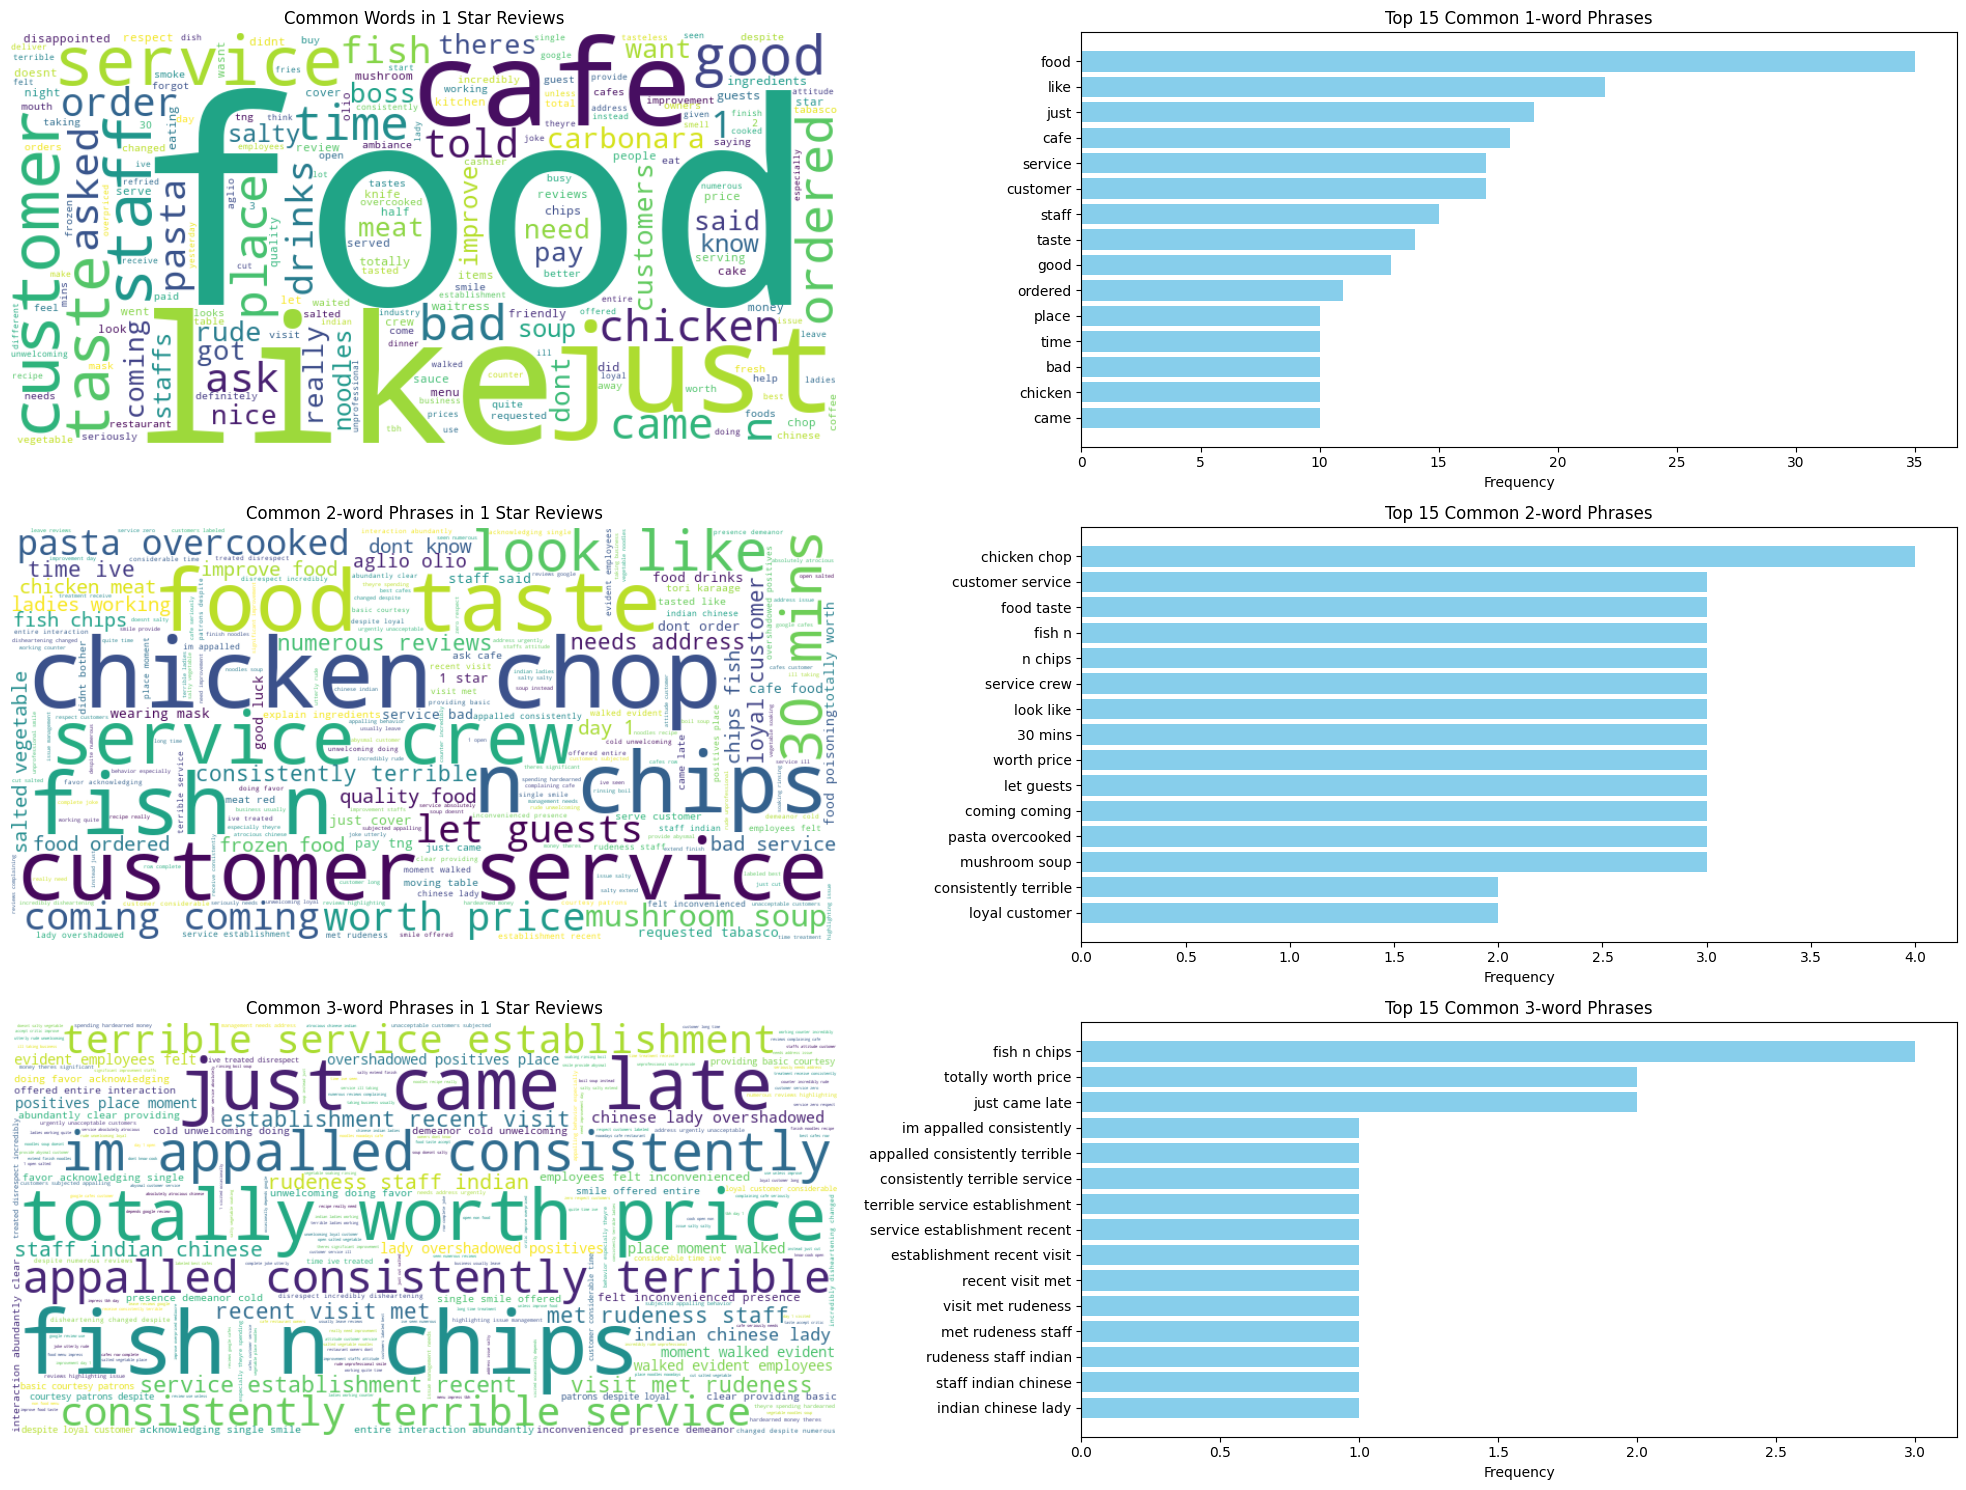

In [70]:
# Graph for 1 star review subset
generate_visualizations_for_review_subset(reviews_by_stars[4])

For 1 star reviews:
1. "bad" is now one of the top 15 words
<br>Sub-conclusion 1: Cafes with 1 star reviews gave customers a negative experience<br><br>
2. There are comments about food and service. But, now there is a 2 word phrase "30 mins"
<br>Sub-conclusion 2: These negative experiences may be caused by food delays<br><br>
3. The 3-word phrases here mostly mention awful service, and staff rudeness.
<br>Overall Conclusion: Cafes with 1 star reviews gave customer negative experiences, which can be from long delays in service or awful and rude service.<br><br>

## 3. What are the overall conclusions we can make from exploring the data?
* To get 5 stars, a cafe must: <br>Provide amazing FOOD, SERVICE and PRICING; and also a good customer experience.
* If a cafe gets 5 stars, then it must: <br>Maintain its quality.
<br>
<br>
* To get 4 stars, a cafe must: <br>Provide FOOD and SERVICE that is good; but not necessarily amazing.
* If a cafe gets 4 stars, then it must: <br>Work to provide a more wholesome and amazing customer experience. It is missing that "Something Special".
<br>
<br>
* To get 3 stars, a cafe must: <br>Provide mediocre food.
* If a cafe gets 3 stars, then it must: <br>Work to improve its food first as it should be at least "good" instead of just "edible". After that, the cafe can focus on positive service to make customers more satisfied.
<br>
<br>
* To get 2 stars, a cafe must: <br>Provide food and service that is not good or flawed.
* If a cafe gets 2 stars, then it must: <br>Work to improve BOTH food and service with emphasis on fixing glaring mistakes that cause customers to have a negative experience, such giving out wrong orders.
<br>
<br>
* To get 1 stars, a cafe must: <br>Provide an overall negative customer experience for food too, but mostly awful service.
* If a cafe gets 1 stars, then it must: <br>Prioritise improving service. Train staff to not be rude and for food to be served on time. At this point, the food doesn't matter as much if the staff gives the customer an awful experience.